
# Lab 1: Exploring Table Data
## by Michael Doherty and Leilani Guzman

## 1. Business Understanding

With an ever-evolving world full of new and emerging technologies, resources are as valuable as ever, and mining remains a vastly important profession in our modern world. However, mining has always had inherent risks and dangers associated with it,
including the threat of seismic activity. Seismic hazards, defined as "hazard[s] associated with potential earthquakes in a particular area" (https://www.usgs.gov/faqs/what-seismic-hazard-what-seismic-hazard-map-how-are-they-made-how-are-they-used-why-are-there), have always been difficult to predict, but advancements in seismic and seismoacoustic monitoring systems have allowed for new, albeit imperfect, prediction methods.

A major problem with the prediction methods created thus far is the large disproportion between low-energy and high-energy seismic activity, leaving most seismic harzards impossible to predict. Thus, this dataset is important, as it can be used to test different machine learning techniques in the hopes of finding a viable prediction method.

The dataset we will be analyzing, titled "seismic-bumps", was created by recording the energy of seismic bumps in a Polish coal mine, and in 2013 it was uploaded to the UCI Machine Learning Repository. The dataset consists of 2584 instances with 19 multivariate attributes, composed of numeric and categorical data types. Each row includes information regarding seismic activity within a single shift (8 hours).

Ultimately, this data enables scientists and other professionals to test different prediction methods in the hopes of finding a reliable way to predict seismic hazards. This research is extrememly important, as it can help save human lives by allowing us to warn miners of incoming, hazardous seismic activity. Mining companies would benefit, as they could use the predictions to prevent the loss of their employees and mining equipment, saving them money. The prediction of when and where seismic hazards will occur could also allow for the research of how to limit (or even prevent) the damage they occur. The prediction of hazardous seismic activity would also be useful outside of a mining context, as it could help save lives when earthquakes occur near populated surface areas. Thus, this data and the research it allows for have several useful business cases.

The question remains though: what does a successful prediction model look like? Ultimately, any valid prediction model would have to have an accuracy greater than 50%, as it should be better than randomly guessing; However, there are several factors that need to be considered:
- **Accuracy**: How accurate the prediction method is at determining when and where seismic hazards will occur is probably the most important factor. We would want this to be as close to 100% as possible; ultimately, however, the target accuracy would be determined by the companies utilizing this prediction method, as they are the ones who would decide how accurate the model needs to be for it to be useful.
- **Number of False Positives and False Negatives**: A good prediction model should minimize the number of false positives and false negatives it predicts. In this context, a false positive would be prediciting a seismic hazard when it does not occur (which could lead to mass panic and the loss of production time, among other things). A false negative would be not predicting a seismic hazard that does occur (which could lead to loss of life and equipment, among other things). Neither of these are optimal and both need to be considered, as trying to only minimize the number of false positives could lead to an increase in the number of false negatives, and vice versa.
- **Lead Time**: An optimal prediction method should be able to predict seismic hazards in a reasonable amount of time before they occur. Predicting seismic hazards 10 seconds before they occur isn't very helpful, but predicting them hours (or even days) in advance would be. Thus, a successful prediction model should allow enough lead time for their predictions to actually matter. 
- **Consistency**: Ideally, we would want a prediction model to be consistent over time and across different geographical regions. However, we would need more data collected from several distinct geographical regions in order to reach this consistency. Thus, while this goal may not be achievable with just this data, a good first step would be creating a consistent prediction method for the area in which this data was collected.

Thus, there are several aspects that need to be considered when trying to create a reliable prediction model. While this bar may seem high, it is necessary, as these prediction methods deal with the safety of humans (and maybe more importantly to large corporations, its predictions would impact their profits in a positive or negative way).

Link to the dataset: https://archive.ics.uci.edu/dataset/266/seismic+bumps

## 2. Data Understanding

### 2.1 Data Types

The dataset consists of 19 attributes with the following descriptions, as provided by the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/266/seismic+bumps):
1. **seismic**: result of shift seismic hazard assessment in the mine obtained by the seismic method (a=lack of hazard, b=low hazard, c=high hazard, d=danger state)

2. **seismoacoustic**: result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method
3. **shift**: information about the type of shift (W=coal-getting, N=preparation shift)
4. **genergy**: seismic energy recorded within previous shift by the most active geophone (GMax) out of geophones monitoring the longwall. Geophones are acoustic devices that record ground vibrations caused by seismic waves.
5. **gpuls**: the number of pulses recorded within previous shift by GMax
6. **gdenergy**: the deviation of energy recorded within the previous shift by GMax from the average energy recorded from the eight previous shifts
7. **gdpuls**: the deviation of a number of pulses recorded within the previous shift by GMax from average number of pulses recorded during eight previous shifts
8. **ghazard**: result of a shift seismic hazard assessment in the mine obtained by the seismoacoustic method based on data from GMax only
9. **nbumps**: the number of seismic bumps recorded within previous shift
10. **nbumps2**: the number of seismic bumps (in energy range [10<sup>2</sup>,10<sup>3</sup>]) registered within previous shift
11. **nbumps3**: the number of seismic bumps (in energy range [10<sup>3</sup>,10<sup>4</sup>]) registered within previous shift
12. **nbumps4**: the number of seismic bumps (in energy range [10<sup>4</sup>,10<sup>5</sup>]) registered within previous shift
13. **nbumps5**: the number of seismic bumps (in energy range [10<sup>5</sup>,10<sup>6</sup>]) registered within the last shift
14. **nbumps6**: the number of seismic bumps (in energy range [10<sup>6</sup>,10<sup>7</sup>]) registered within previous shift
15. **nbumps7**: the number of seismic bumps (in energy range [10<sup>7</sup>,10<sup>8</sup>]) registered within previous shift
16. **nbumps89**: the number of seismic bumps (in energy range [10<sup>8</sup>,10<sup>10</sup>]) registered within previous shift
17. **energy**: total energy from seismic bumps within previous shift
18. **maxenergy**: the maximum energy of the seismic bumps registered within previous shift
19. **class**: the decision label - '1' indicates that a high energy seismic bump occurred in the next shift (hazardous state), '0' indicates that no high energy seismic bumps occurred in the next shift (non-hazardous state)


In [37]:
import pandas as pd
import numpy as np
from scipy.io import arff

data = arff.loadarff('data/seismic-bumps.arff')

df = pd.DataFrame(data[0])

# Convert the byte strings to normal strings
df['seismic'] = df['seismic'].str.decode('utf-8')
df['seismoacoustic'] = df['seismoacoustic'].str.decode('utf-8')
df['shift'] = df['shift'].str.decode('utf-8')
df['ghazard'] = df['ghazard'].str.decode('utf-8')
df['class'] = df['class'].str.decode('utf-8')

df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Originally, the columns with values of type object were stored as byte strings (such as b'a'). Thus, we used the decode function to convert it to a regular string (as this is much easier to work with).

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

The categorical attributes are stored as objects, which is acceptable since they are nominal features. The numerical attributes are stored as float64's, as they are continuous variables regarding energy, pulse, and counts of seismic bumps. 

As per the above dataframe information, it is important to note that there is no missing data; each attribute has the same number of non-null entries (2584) as the total number of entries in the dataset.

If there were missing data values in the dataset, we would utilize the K-Nearest Neighbor Imputation with 5 neighbors; we would use the resulting mode to determine any missing categorical features, while we would use either the median (for discrete numerical data) or mean (for continuous numerical data) to determine missing numerical features.

In [39]:
df.describe().round(2)

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy
count,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.0,2584.0,2584.0,2584.00,2584.00
mean,90242.52,538.58,12.38,4.51,0.86,0.39,0.39,0.07,0.00,0.0,0.0,0.0,4975.27,4278.85
std,229200.51,562.65,80.32,63.17,1.36,0.78,0.77,0.28,0.07,0.0,0.0,0.0,20450.83,19357.45
min,100.00,2.00,-96.00,-96.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00
25%,11660.00,190.00,-37.00,-36.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00
50%,25485.00,379.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00
75%,52832.50,669.00,38.00,30.25,1.00,1.00,1.00,0.00,0.00,0.0,0.0,0.0,2600.00,2000.00
max,2595650.00,4518.00,1245.00,838.00,9.00,8.00,7.00,3.00,1.00,0.0,0.0,0.0,402000.00,400000.00


As the dataframe shows, nbumps6, nbumps7, and nbumps89 all have minimum and maximum values of 0 (indicating that no bumps occurred with greater than 10<sup>6</sup> energy). Therefore, we will remove these columns, as they do not provide any useful information.

In [40]:
# drop unneeded columns 
df = df.drop(['nbumps6', 'nbumps7', 'nbumps89'], axis=1)

# show that the columns were removed
df.describe().round(2)

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
count,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00,2584.00
mean,90242.52,538.58,12.38,4.51,0.86,0.39,0.39,0.07,0.00,4975.27,4278.85
std,229200.51,562.65,80.32,63.17,1.36,0.78,0.77,0.28,0.07,20450.83,19357.45
min,100.00,2.00,-96.00,-96.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11660.00,190.00,-37.00,-36.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,25485.00,379.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,52832.50,669.00,38.00,30.25,1.00,1.00,1.00,0.00,0.00,2600.00,2000.00
max,2595650.00,4518.00,1245.00,838.00,9.00,8.00,7.00,3.00,1.00,402000.00,400000.00


### 2.2 Data Quality

 Based on the description of the dataframe there do not appear to be any extreme outliers. Due to the nature of the data, it is necessary to include seemingly outlier data points, such as high values in seismic energy or number of pulses, as these are expected during seismic hazard events that we are trying to predict. There are also instances such as in *nbumps* where it is acceptable to have a zero value, as it is important to note both the presence and absence of seismic bumps.

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import missingno as mn

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# check for duplicates
print("Duplicate Data Entries:")
print(df.duplicated().sum())

Duplicate Data Entries:
6


In [42]:
# show duplicate rows
print("===Duplicate Rows===")
print(df[df.duplicated(keep='first')].sort_values(by=list(df.columns)))

===Duplicate Rows===
     seismic seismoacoustic shift   genergy  gpuls  gdenergy  gdpuls ghazard  \
1017       a              a     N     590.0   11.0     -74.0   -72.0       a   
1018       a              a     N    3720.0   43.0      75.0     8.0       a   
89         a              a     N   63550.0  325.0      15.0    35.0       a   
90         a              a     W  194580.0  697.0     -35.0   -32.0       a   
972        a              b     N    5250.0   66.0     -49.0    36.0       a   
973        a              b     N   19420.0   60.0      98.0    20.0       a   

      nbumps  nbumps2  nbumps3  nbumps4  nbumps5  energy  maxenergy class  
1017     0.0      0.0      0.0      0.0      0.0     0.0        0.0     0  
1018     0.0      0.0      0.0      0.0      0.0     0.0        0.0     0  
89       0.0      0.0      0.0      0.0      0.0     0.0        0.0     0  
90       0.0      0.0      0.0      0.0      0.0     0.0        0.0     0  
972      0.0      0.0      0.0      0.

There are only 6 rows in the dataset that have a duplicate, which is a very small percentage of the total dataset. After examining the dataset, it became aparent that all the duplicate rows also occur in the same pattern; duplicate rows occur in pairs, and each duplicate row is a duplicate of a row 2 spots ahead of it. For example, row 89 is a copy of row 87, and row 90 is a copy of row 88. Due to the low number of duplicate rows, and the duplicates all occurring in the same exact pattern, we determined that these duplicate rows are likely due to a glitch in the recording equipment or human error in the data entry process. Thus, we decided to remove these rows from the dataset.

In [43]:
#remove duplicates
df.drop_duplicates(keep='first', inplace=True)

## 3. Data Visualization


### 3.1 Feature Distributions


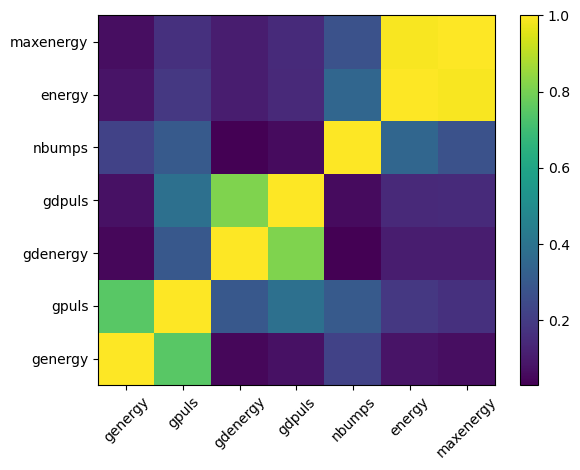

In [44]:
# make correlation matrix
variables = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'nbumps', 'energy', 'maxenergy']
plt.pcolor(df[variables].corr())

plt.yticks(np.arange(.5, len(variables), 1), variables, fontsize=10)
plt.xticks(np.arange(.5, len(variables), 1), variables, rotation=45, fontsize=10)
plt.colorbar()
plt.show()

Based on the correlation matrix, it is interesting to note that there are only positive correlations among the numerical variables. The strongest correlation is between the total energy of the seismic bumps and the maximum energy of the seismic bumps, which seems logical. Other strong correlations are seen between the number of pulses and the seismic energy, and between the deviations of each of these attributes. This makes sense, as this indicates that as more pulses are seen in a shift, there is also higher seismic energy, which is expected since pulses cause tremors in the earth which are recorded as seismic energy.

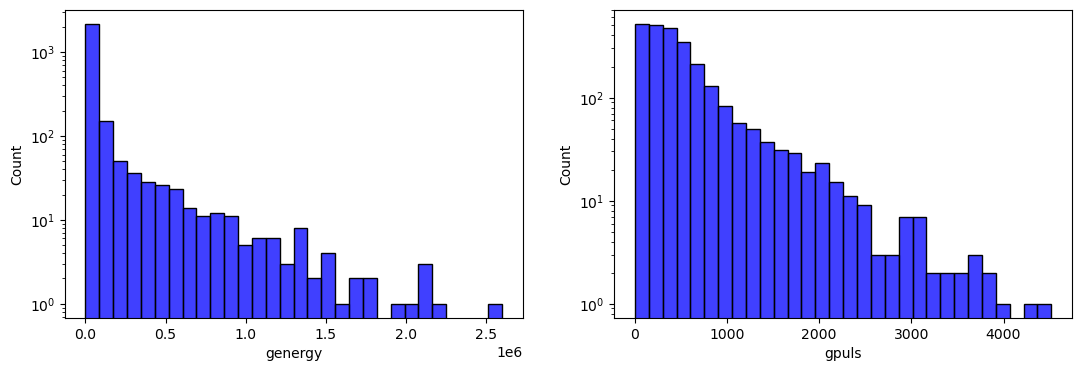

In [45]:
import seaborn as sns

plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(df.genergy, color='blue', bins=30)
plt.yscale('log')


plt.subplot(1,2,2)
sns.histplot(df.gpuls, color='blue', bins=30)
plt.yscale('log')

From the two above distributions of genergy and gpuls we can see that both features tend to be more concentrated around lower values, with lower concentration around higher values of energy and number of pulses. This behavior is expected, since most seismic activity recorded has lower seismic energy around 100,000 and around 500 pulses in a shift. Meanwhile, there is less seismic activity with higher energy and number of pulses. In the few extreme cases, the seismic energy reaches values around 2 million, while the number of pulses becomes more concentrated around 3000-4000. These skewed distributions could be attributed to the nature of the data collected, since more extreme hazardous seismic activity is less common in the dataset and in the real world.

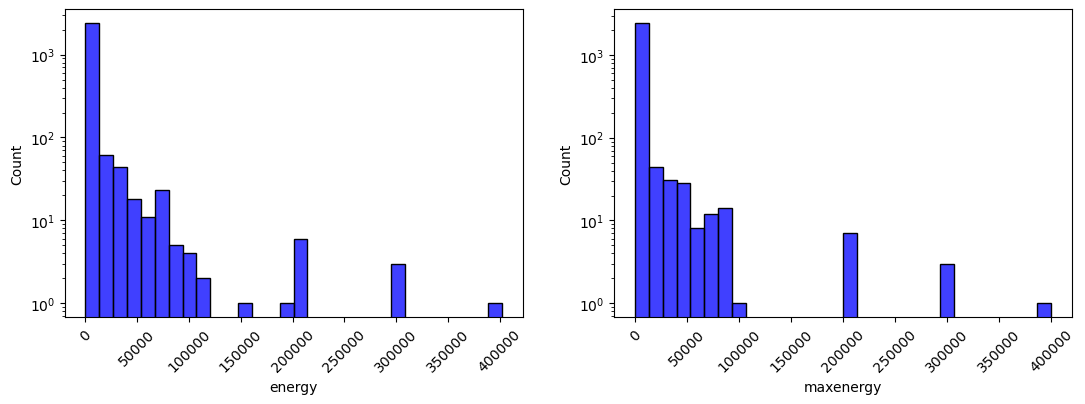

In [46]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.histplot(df.energy, color='blue', bins=30)
plt.xticks(rotation=45)
plt.yscale('log')

plt.subplot(1,2,2)
sns.histplot(df.maxenergy, color='blue', bins=30)
plt.xticks(rotation=45)
plt.yscale('log')

*Discuss here*



([<matplotlib.axis.XTick at 0x2bf263029d0>,
 [Text(0, 0, 'non-hazardous'), Text(1, 0, 'hazardous')])

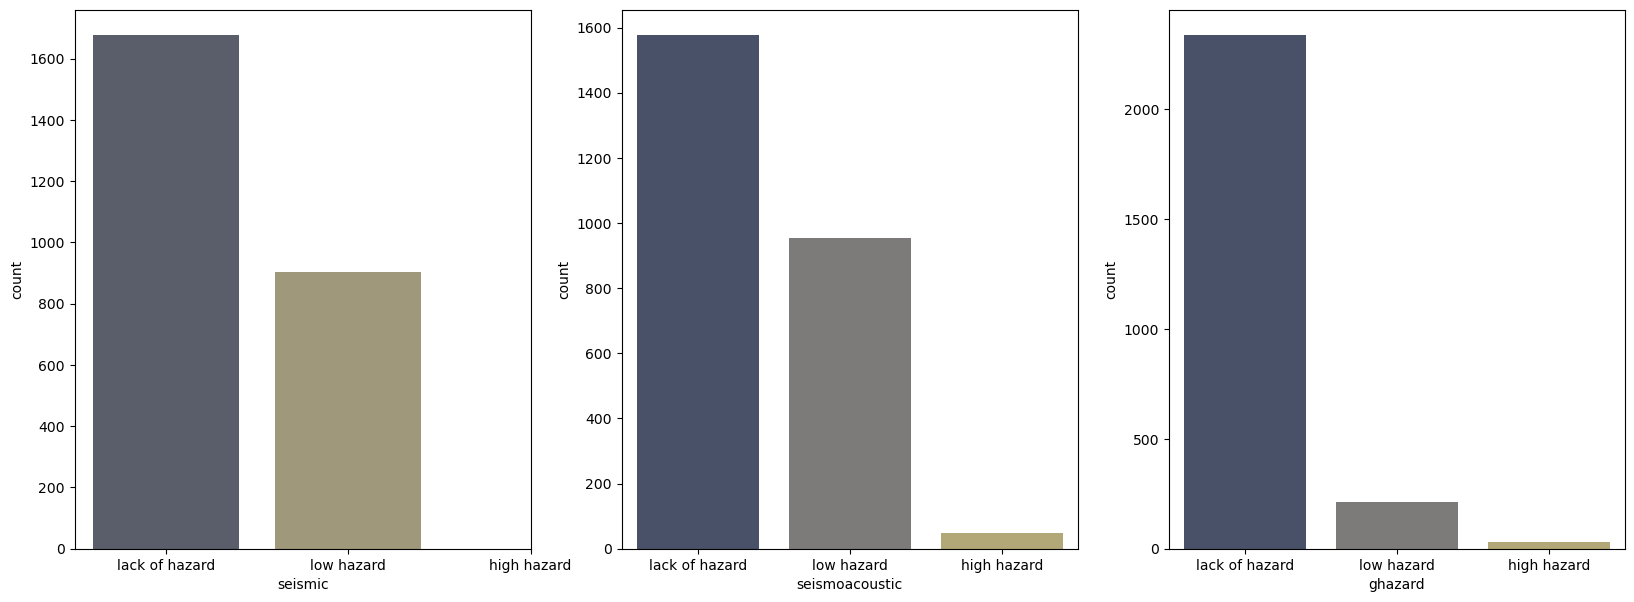

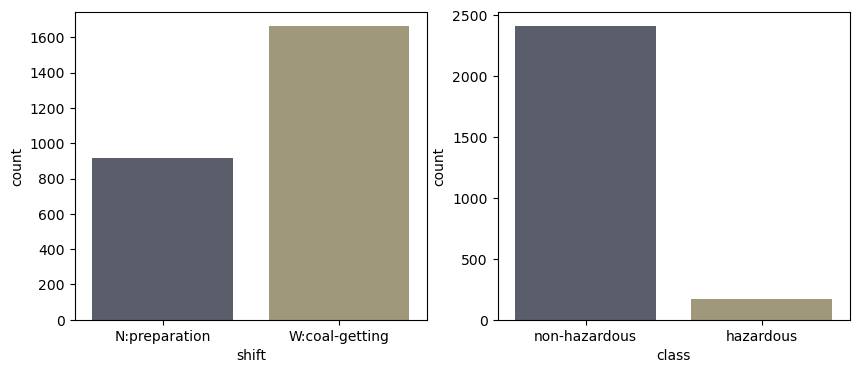

In [47]:
plt.subplots(figsize=(20, 7))

plt.subplot(1,3,1)
sns.countplot(x='seismic', data=df, palette='cividis')
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard'])

plt.subplot(1,3,2)
sns.countplot(x='seismoacoustic', data=df, palette='cividis')
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard'])

plt.subplot(1,3,3)
sns.countplot(x='ghazard', data=df, palette='cividis')
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard'])

#plot the distribution of the shift variable
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='shift', data=df, palette='cividis')
plt.xticks([0,1], ['N:preparation', 'W:coal-getting'])

plt.subplot(1,2,2)
sns.countplot(x='class', data=df, palette='cividis')
plt.xticks([0,1], ['non-hazardous', 'hazardous'])



*Discuss here*
Mention seismic vs seismoacoustic method

### 3.2 Questions

**1. How does the seismic energy relate to the number of seismic bumps with respect to the shift type?**


<Figure size 1300x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

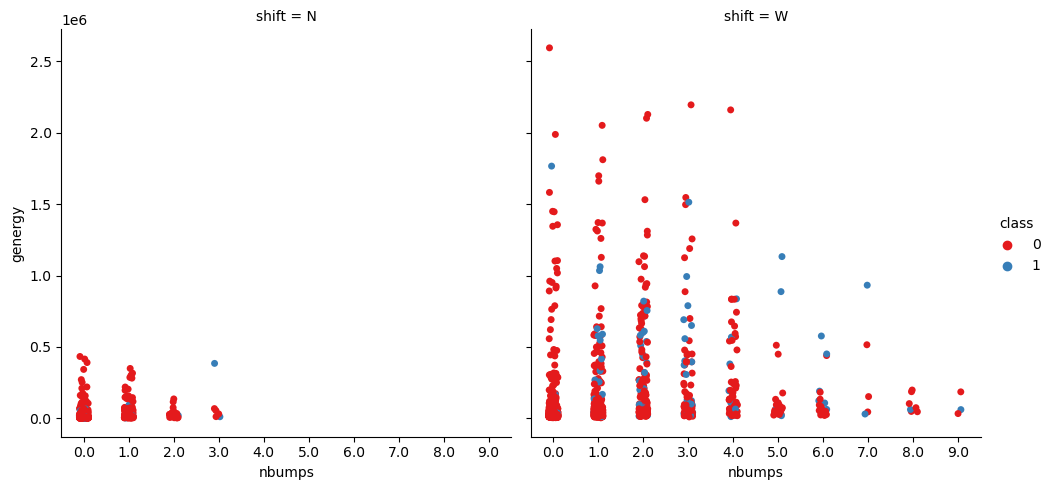

In [48]:
plt.figure(figsize=(13,4))

# plt.subplot(1,2,1)
# sns.violinplot(x='class', y='genergy', data=df, palette='Set1')
# plt.xticks([0,1], ['non-hazardous', 'hazardous'])
# plt.subplot(1,2,2)
# sns.violinplot(x='class', y='nbumps', data=df, palette='Set1')
# plt.xticks([0,1], ['non-hazardous', 'hazardous'])

plt.figure(figsize=(15,4))
sns.catplot(x='nbumps', y='genergy', hue='class', col='shift', data=df, palette='Set1', jitter=True)

*Discuss question 1 results*

**2. Which method, seismic or seismoacoustic, was more accurate at predicting the class (hazardous or not)?**

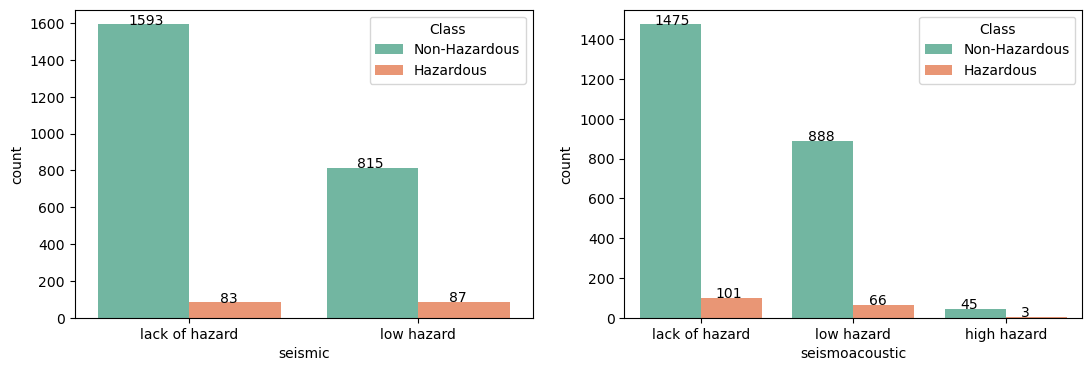

In [94]:
plt.figure(figsize=(13,4))

# seismic plot
plt.subplot(1,2,1)
sns.countplot(x='seismic', hue='class', data=df, palette='Set2')
plt.xticks([0,1], ['lack of hazard', 'low hazard']) # set x-axis labels

for bar in plt.gca().patches: # add total count to the bars
    plt.gca().annotate(int(bar.get_height()), (bar.get_x() + bar.get_width() / 3, bar.get_height()))

plt.legend(title='Class', labels=['Non-Hazardous', 'Hazardous'])

# seismoacoustic plot
plt.subplot(1,2,2)
sns.countplot(x='seismoacoustic', hue='class', data=df, palette='Set2')
plt.xticks([0,1,2], ['lack of hazard', 'low hazard', 'high hazard']) # set x-axis labels

for bar in plt.gca().patches: # add total count to the bars
    plt.gca().annotate(int(bar.get_height()), (bar.get_x() + bar.get_width() / 4, bar.get_height()))

plt.legend(title='Class', labels=['Non-Hazardous', 'Hazardous'])

According to the above plots, the seismic method successfully predicted "Non-Hazardous" 1593 times and "Hazardous" 87 times, for a total accuracy of **65.2%**. The seismoacoustic method successfully predicted "Non-Hazardous" 1475 times and "Hazardous" 69 times, for a total accuracy of **59.9%**. Thus, we can see that the seismic method was more accurate than the seismoacoustic method at determining if there would be hazardous seismic activity.

We can also see that the seismic method has fewer false positives (83 vs. 101) and fewer false negatives (815 vs. 933) than the seismoacoustic method, once again suggesting that the seismic method is better.

However, there are other factors that should also be considered. It's worth noting that the class only specifies two different states ("Non-Hazardous" and "Hazardous"), while both the seismic and seismoacoustic methods had four possible prediction states ("Lack of hazard", "Low hazard", "High hazard", and "Danger state"). The seismoacoustic method had a wider range of responses, as it predicted "High hazard" on several occasions, while the seismic method only predicted "Lack of hazard" or "Low hazard". Since the class doesn't differentiate between different hazardous states, we cannot determine whether the seismic or seismoacoustic method was better at predicting the strength of hazardous seismic activity.

Thus, while the seismic method is overall more accurate, we believe the seismoacoustic method likely also provides relevant information in determining if there will be hazardous seismic activity, as it appears to be better at detecting stronger, hazardous seismic activity.

**3. Is there a relationship between max energy and the class decision?**

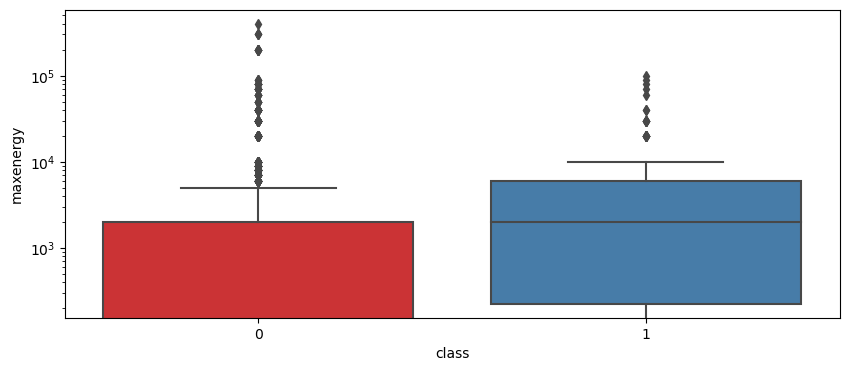

In [83]:
#explore the relationship between max energy and the class
plt.figure(figsize=(10,4))
sns.boxplot(x='class', y='maxenergy', data=df, palette='Set1')
plt.yscale('log')

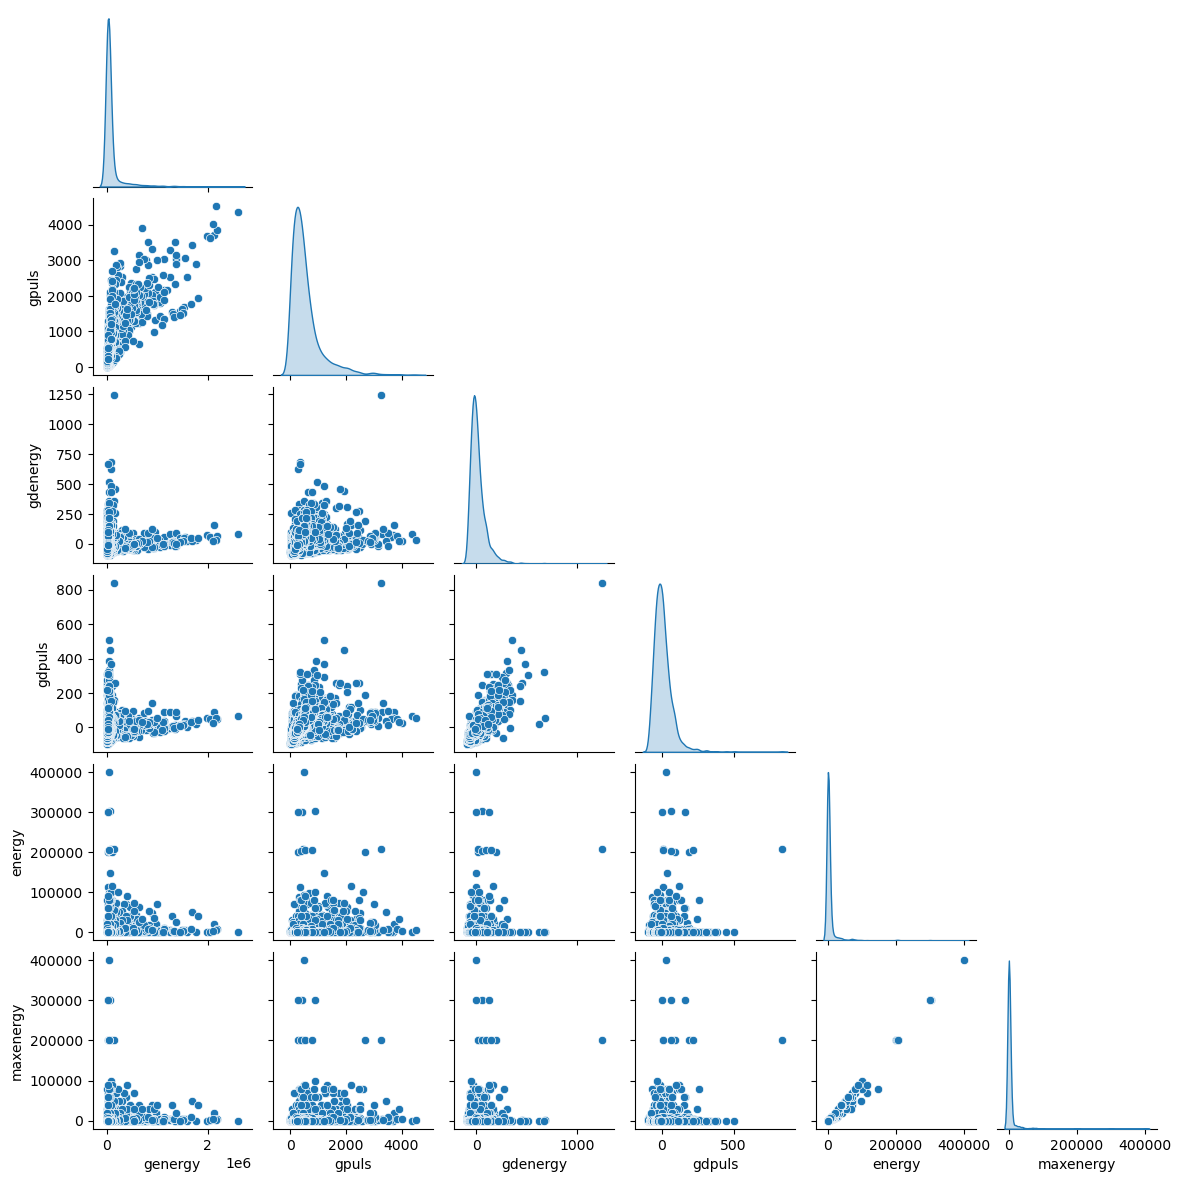

In [ ]:
variables = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
sns.pairplot(df[variables], diag_kind='kde', height=2,
             kind='scatter', corner=True)

## 4. UMAP Dimensionality Reduction

A common issue in datasets is high dimensionality, which is defined as the number of features in the dataset being more than (or close to) the number of instances. These high numbers of features and sparse data points can result in overfitting and overall poor performance of machine learning models.

In order to resolve these issues, there exists dimensionality reduction techniques, which are used to reduce the number of features in a dataset. This allows for faster and more memory efficient algorithms, better visualizations of the data, and utilization of a subset of more relevant features.

One of the common techniques for dimensionality reduction is Uniform Manifold Approximation Projection (UMAP). In simplest terms, UMAP first constructs a high dimensional graph of the data, and then maps this to a similar lower dimensional graph. The high dimensional graph is represented as a weighted graph, in which the edge weights represent the probability that two points are connected. The technique utilizes a radius projected from each point and any points radius that overlap will be connnected. Deciding how big this radius is is crucial, as too big or small of a radius could result in everything being connected or very small isolated clusters. 

Some of the key parameters used in UMAP are:
- **n_neighbors**: the number of neighbors that are closest to a point, used to create the high dimensional graph.
- **min_dist**: the minimum distance between points in the low dimensional graph.
- **n_components**: the dimension the data will be reduced to, default is 2.
- **metric**: how the distance between points is calculated

Since the algorithm uses distance metrics, it is crucial to scale the data accordingly to give equal weight to each feature. For example, the distance between values in genergy is much larger than the distance between values in nbumps, which would give genergy more weight in algorithm. First the data will need to be normalized, and then the data will be fitted and transformed using UMAP.

References:
- https://umap-learn.readthedocs.io/en/latest/index.html
- https://pair-code.github.io/understanding-umap/


In [ ]:
import umap
import sklearn.cluster as cluster
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
%matplotlib inline

# Quantile transformer to normalize the data
df_transformed = make_pipeline(QuantileTransformer()).fit_transform(df[variables])
df_transformed = pd.DataFrame(df_transformed, columns=variables)

#initialize UMAP and fit it to the dataset

embedding_2D = umap.UMAP(n_neighbors = 30, min_dist=.2, metric='euclidean').fit_transform(df_transformed[variables], df['class'])
#print the new shape
print('New shape: ', embedding_2D.shape)


New shape:  (2584, 2)


The UMAP algorithm projects the dataset into 2 dimensions, which explains the new shape seen above. 

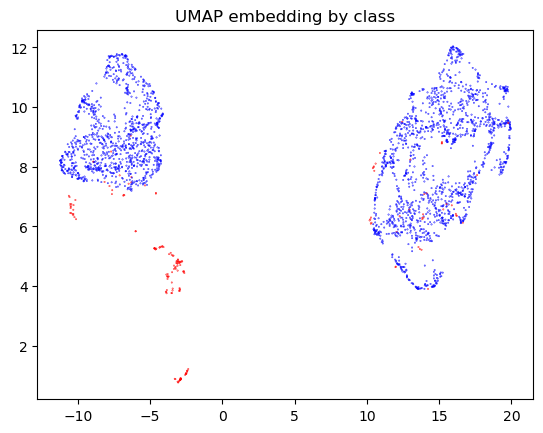

In [ ]:
plt.title('UMAP embedding by class')
plt.scatter(embedding_2D[:, 0], embedding_2D[:, 1], c=df['class'].astype('category').cat.codes, s=0.1, cmap='bwr')

(*Needs editing*)
In this case there appears to be 3 clusters of seismic activity, where the red dots indicate a hazardous event. One thing to note is that not all the hazardous events are clustered together, indicating that there are other factors that contribute to the severity of the event that are not represented in this dataset. This observation also emphasizes that these hazardous seismic events can not be predicted exactly, since warning signs could be present but ultimately remain non-hazardous. However, this does not mean that the model is not useful, as it can still be used to predict the likelihood of a hazardous event occuring.